# **Download dataset Pitts30k from Google Drive**

In [1]:
from google.colab import drive
import os
import sys, os


if not os.path.isfile('/content/pitts30k.zip'):
    !gdown --id 1QpF5nO1SivJ5QOx1kkhoCeMqFvvrksey
    !jar xvf  "/content/pitts30k.zip"

if not os.path.isdir('/content/pitts30k'):
    print("Dataset Pitts30k doesn't exist")

Output streaming troncato alle ultime 5000 righe.
 inflated: pitts30k/images/val/queries/@0584753.22@4477116.13@17@T@040.44037@-080.00066@006138@00@@@@@@pitch1_yaw1@.jpg
 inflated: pitts30k/images/val/queries/@0584753.22@4477116.13@17@T@040.44037@-080.00066@006138@11@@@@@@pitch1_yaw12@.jpg
 inflated: pitts30k/images/val/queries/@0584753.22@4477116.13@17@T@040.44037@-080.00066@006138@26@@@@@@pitch2_yaw3@.jpg
 inflated: pitts30k/images/val/queries/@0584753.22@4477116.13@17@T@040.44037@-080.00066@006138@28@@@@@@pitch2_yaw5@.jpg
 inflated: pitts30k/images/val/queries/@0584753.22@4477116.13@17@T@040.44037@-080.00066@006138@32@@@@@@pitch2_yaw9@.jpg
 inflated: pitts30k/images/val/queries/@0584754.00@4477117.81@17@T@040.44039@-080.00065@006136@04@@@@@@pitch1_yaw5@.jpg
 inflated: pitts30k/images/val/queries/@0584754.00@4477117.81@17@T@040.44039@-080.00065@006136@32@@@@@@pitch2_yaw9@.jpg
 inflated: pitts30k/images/val/queries/@0584754.49@4477118.85@17@T@040.44040@-080.00064@003392@30@@@@@@pitch2

# **Explore the Pitss30k dataset**

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from cycler import cycler

**Count images in each set**

In [4]:
dir = "/content/pitts30k/images/"
folders = ['test', 'train', 'val']
subfolders = ['database', 'queries']

matrix = []
for f in folders:
    submatrix = []
    for sf in subfolders:
        files = os.listdir(dir+f+"/"+sf)
        number_files = len(files)
        submatrix.append(number_files)
    matrix.append(submatrix)

pd.DataFrame(matrix, columns = subfolders, index = folders)

,database,queries
test,10000,6816
train,10000,7416
val,10000,7608


**Plot data distribution** 
<br/><br/>
We want to understand how dense it is and the distribution of the labels

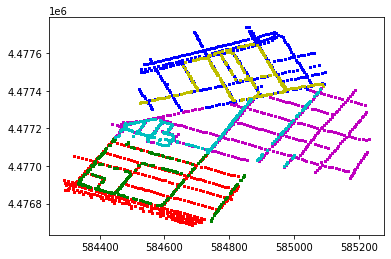

In [5]:
fig, ax = plt.subplots()
custom_cycler=(cycler(color=['r','g','b','y','m','c']))
ax.set_prop_cycle(custom_cycler)
for f in folders:
    for sf in subfolders:
        UTM_easting = []
        UTM_northing = []
        UTM = np.array([(name.split("@")[1], name.split("@")[2]) for name in os.listdir(dir+f+"/"+sf+"/")]).astype(float)
        ax.scatter(UTM[:,0], UTM[:,1], marker='.', linewidth=0)

**Print some images**

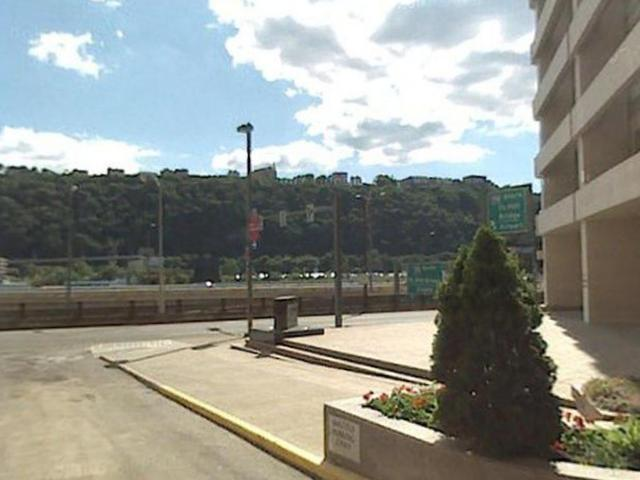

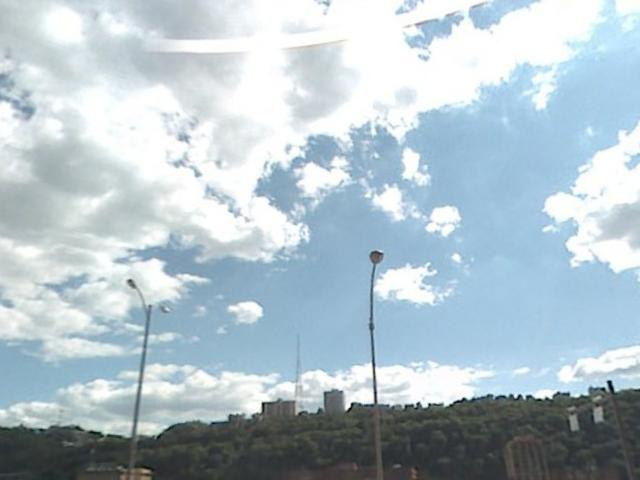

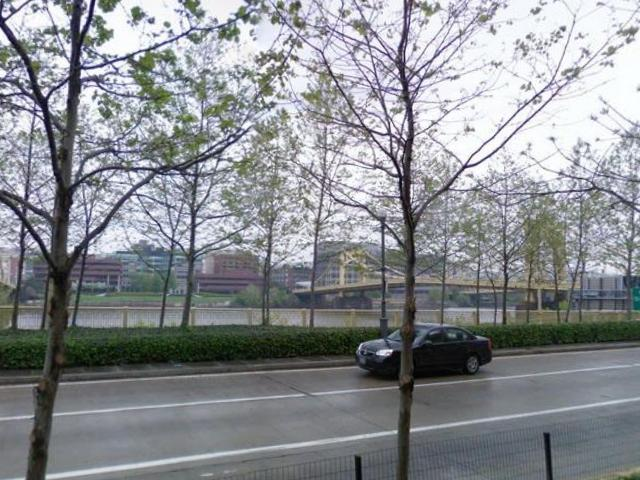

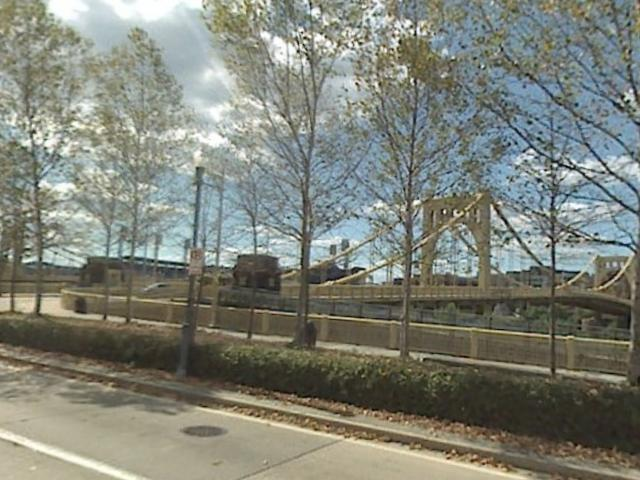

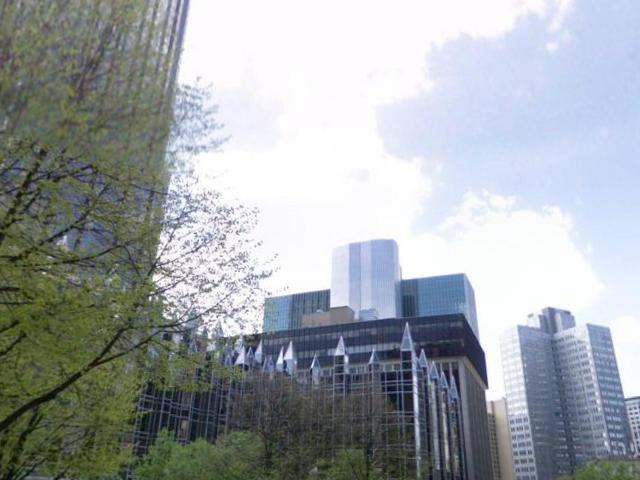

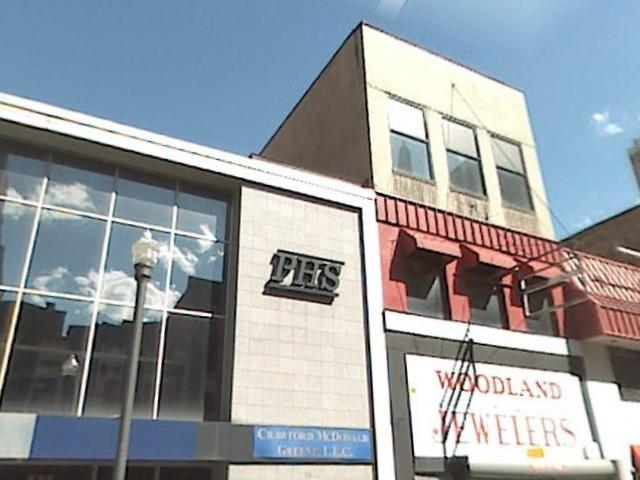

<Figure size 1800x288 with 0 Axes>

In [6]:
from random import sample
from IPython.core.display import Image, display

fig = plt.figure(figsize=(25, 4))
for f in folders:
    for sf in subfolders:
        files = os.listdir(dir+f+"/"+sf)
        random_image = sample(files,1)  
        display(Image(filename=dir+f+"/"+sf+"/"+random_image[0]))